In [1]:
from models import *
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets import *
from constants import *
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from segmentation_inference import *
from util import load_segmentation_model


device = "cpu"
from custom_transformations import *



In [2]:
"""transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = JSRTDataset(image_folder="data/JSRT/png_images",
                      mask_folder="data/JSRT/masks/both_lungs",
                      image_transform=image_transformation, mask_transform=mask_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
input_data, gt = (next(iter(dataloader)))
input_data.to(device)
gt.to(device)

with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.round(output)
    gt = gt.squeeze()
    gtbool = gt > 0.5
    outputbool = output > 0.5
    intersection = torch.logical_and(gtbool, outputbool)
    union = torch.logical_or(gtbool, outputbool)
    print(torch.sum(intersection) / torch.sum(union))
    input_img = transforms.ToPILImage()(gt)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gt)
    ax2.imshow(output_img)"""

'transformation_list = [\n    transforms.Resize((256, 256)),\n    transforms.ToTensor(),\n]\n\nimage_transformation = transforms.Compose(transformation_list)\nmask_transformation = transforms.Compose(\n    transformation_list)\n\nprint("Start loading dataset")\n\ndataset = JSRTDataset(image_folder="data/JSRT/png_images",\n                      mask_folder="data/JSRT/masks/both_lungs",\n                      image_transform=image_transformation, mask_transform=mask_transformation)\ndataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)\ninput_data, gt = (next(iter(dataloader)))\ninput_data.to(device)\ngt.to(device)\n\nwith torch.no_grad():\n    output = model(input_data)["out"]\n    output = output.squeeze()\n    output = torch.round(output)\n    gt = gt.squeeze()\n    gtbool = gt > 0.5\n    outputbool = output > 0.5\n    intersection = torch.logical_and(gtbool, outputbool)\n    union = torch.logical_or(gtbool, outputbool)\n    print(torch.sum(intersection) / torch.sum(uni

In [3]:
"""transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]
image_transformation_list = [
    transforms.Resize((256, 256)),
    HistogramEqualization()
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",
                          uncertainty_policy="zeros", transform=image_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

input_data, _ = (next(iter(dataloader)))

with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.sigmoid(output)
    print(output.max())
    output = torch.round(output)
    print(output)
    input_data = input_data.squeeze()
    input_img = transforms.ToPILImage()(input_data)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(input_img)
    ax2.imshow(output_img)"""

'transformation_list = [\n    transforms.Resize((256, 256)),\n    transforms.ToTensor(),\n]\nimage_transformation_list = [\n    transforms.Resize((256, 256)),\n    HistogramEqualization()\n    transforms.ToTensor(),\n]\n\nimage_transformation = transforms.Compose(transformation_list)\nmask_transformation = transforms.Compose(\n    transformation_list)\n\nprint("Start loading dataset")\n\ndataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",\n                          uncertainty_policy="zeros", transform=image_transformation)\ndataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)\n\ninput_data, _ = (next(iter(dataloader)))\n\nwith torch.no_grad():\n    output = model(input_data)["out"]\n    output = output.squeeze()\n    output = torch.sigmoid(output)\n    print(output.max())\n    output = torch.round(output)\n    print(output)\n    input_data = input_data.squeeze()\n    input_img = transforms.ToPILImage()(input_data)\n    output_img = transforms.To

Start loading dataset


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_env/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Label: 0.0
CTR: 1.0039370078740157


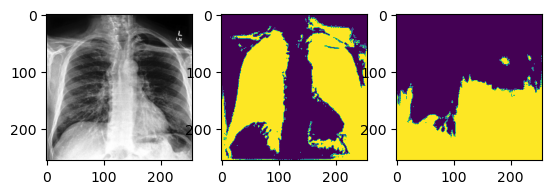

In [5]:

image_transformation_list = [
    transforms.Resize((256, 256)),
    HistogramEqualization(),
    transforms.ToTensor(),
]

mask_transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(image_transformation_list)
mask_transformation = transforms.Compose(
    mask_transformation_list)

print("Start loading dataset")

dataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",
                          uncertainty_policy="zeros", transform=image_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

heart_model = load_segmentation_model("models/heart_segmentation/unet_vgg16_no_aug_lr=0.0001_batch=8_28.3_19:33.pth", device="cpu")
lung_model = load_segmentation_model("models/lung_segmentation/unet_vgg16_no_aug_lr=0.0001_batch=8_28.3_19:19.pth", device="cpu")

input_data, label = (next(iter(dataloader)))

heart_mask = infer_from_tensor(input_data, heart_model, device="cpu")
lung_mask = infer_from_tensor(input_data, lung_model, device="cpu")

ctr = ctr_from_tensor(input_data, heart_segmentation_model=heart_model, lung_segmentation_model=lung_model)
input_data = input_data.squeeze()
input_img = transforms.ToPILImage()(input_data)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(input_img)
ax2.imshow(transforms.ToPILImage()(lung_mask))
ax3.imshow(transforms.ToPILImage()(heart_mask))

print(f"Label: {label.item()}")
print(f"CTR: {ctr}")
